

# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil. In this analysis, we,ll try to find what are the corellations between different features and not showing on the appointment scheduled by the patient. 

### Question(s) for Analysis
* 1. Does there any relationship between gendar and No=Show?
* 2. Does there any relationship between age and No=Show?
* 3. Does there any relationship between receiving-sms and No=Show?
* 4. Does there any relationship between Neighbourhood and No=Show?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline 



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



Let's have a look on our dataframe by showing a few header rows.

In [3]:
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now let's know more about our data, what are its features ? shape , data types , null values .......etc.

In [4]:
#Find  the number of the patients (rows) and how many columns do we have. 
df.shape 

(110527, 14)

In [5]:
#I'd like to see if there any missing values and have a look on the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Mmmmmm seems like there are not any missing values. This is great !!!!!!!

What about unique values !

In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Duplicated Values 

In [7]:
sum(df.duplicated())

0

In [8]:
# Let's learn more about our dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 * Well ! the mean age of our patients in this dataset is 37 years old.
 
* But there seems to be some wrong value in age column. It shows that there is someone his age is written in a negative value which is not a logical value.
   
* let's check for this in the next cell.
    


In [9]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Fine, It's only one row.


### Data Cleaning


First of all,  I will drop the row containing the negative value of age.

In [10]:
df.drop([99832], axis=0, inplace=True)

Check again it's gone 

In [11]:
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now I'm gonna drop the columns which I think I don't need for my analysis and confirm changes.

In [12]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here we can replace dashes with underscores and lowercase labels. 

In [13]:
df.rename(columns=lambda x: x.lower().replace("-", "_"), inplace=True)

df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How would each variable affect on No-Show?)

Let's have a look on each varible on its own 

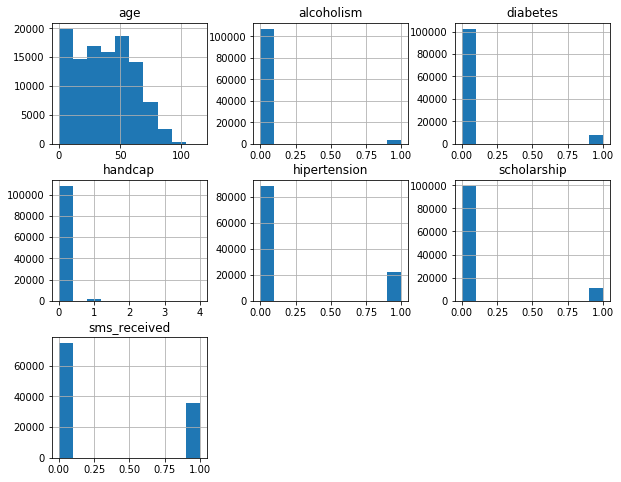

In [14]:
df.hist(figsize = (10, 8));

* As we noteced in above statistics the majority of patients' age is between 15 an 55 years old, and Age histogram is skwed to the right.
* There is a large number of people didn't receive a reminder SMS.


### Research Question 2  (Is There a correlation between the age and No-Show ?)

In [15]:
show = df.no_show == 'No'
no_show =df.no_show == 'Yes'

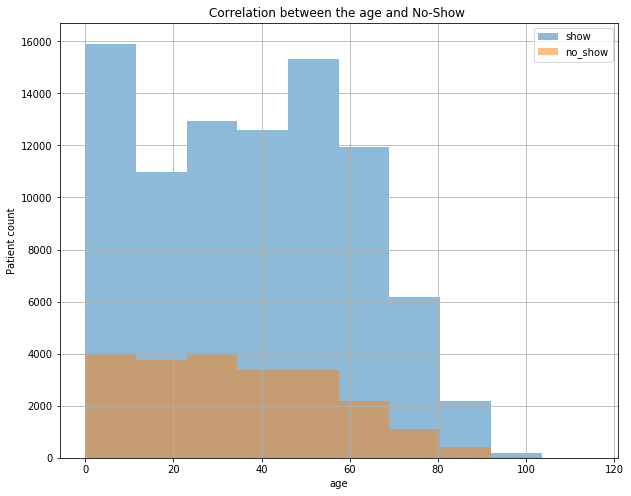

In [16]:
plt.figure(figsize=(10, 8))
df.age[show].hist(alpha=.5, label= 'show')
df.age[no_show].hist(alpha=.5, label= 'no_show')
plt.legend()
plt.title('Correlation between the age and No-Show ')
plt.xlabel('age')
plt.ylabel('Patient count');

* In the previous graph I tried to find out if there any realtionship between the age of the the patient and not showing up, so I made this histogram between the age and the number of the patients while age was filtered by show and no-show.

* Where I found a strong correlation between the age and not showing up .

* This histogram is skewed to the right which means that no-show is associated with old ages. 

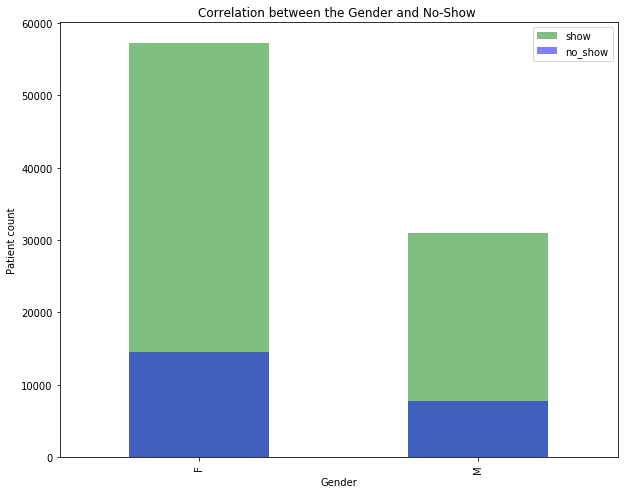

In [17]:
plt.figure(figsize=(10, 8))
df.gender[show].value_counts().plot(alpha=.5, label= 'show', kind='bar', color='green' )
df.gender[no_show].value_counts().plot(alpha=.5, label= 'no_show', kind='bar', color='blue' )
plt.legend()
plt.title('Correlation between the Gender and No-Show ')
plt.xlabel('Gender')
plt.ylabel('Patient count');

* In the previous graph I tried to find out if there any realtionship between the Gender of the the patient and not showing up, so I made this bar plot between the gender and the number of the patients, while gender was filtered by show and no-show.



* Where I didn't find a  correlation between the gender and not showing up .



* While the number of female patients is already larger the number of the male patients in this dataset so, female patients didn't show up was logical to appear more than male patients.

In [18]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

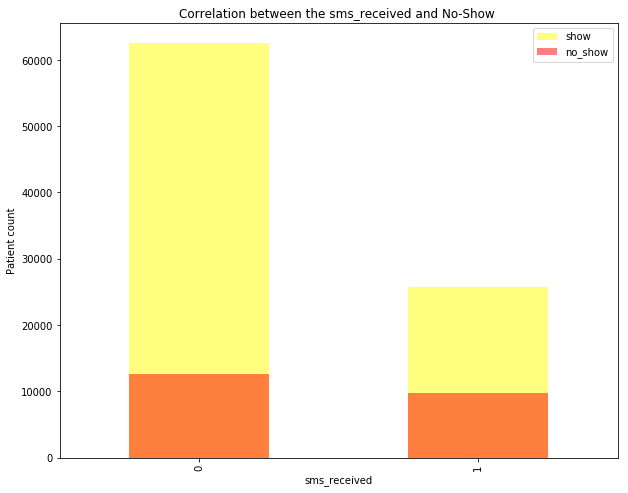

In [23]:
plt.figure(figsize=(10, 8))
df.sms_received[show].value_counts().plot(alpha=.5, label= 'show', kind='bar', color='yellow' )
df.sms_received[no_show].value_counts().plot(alpha=.5, label= 'no_show', kind='bar', color='red' )
plt.legend()
plt.title('Correlation between the sms_received and No-Show ')
plt.xlabel('sms_received')
plt.ylabel('Patient count');


* In the previous graph I tried to find out if there any realtionship between the patients who received a reminder SMS and not showing up, so I made this bar plot between SMS received and the number of the patients, while SMS received was filtered by show and no-show.



* Where I found something very interesting, people who received SMS are not showing more than the people who didn't receive an SMS.



* According to this result I don't think there is a relationship between not receiving a reminder SMS and no-show.

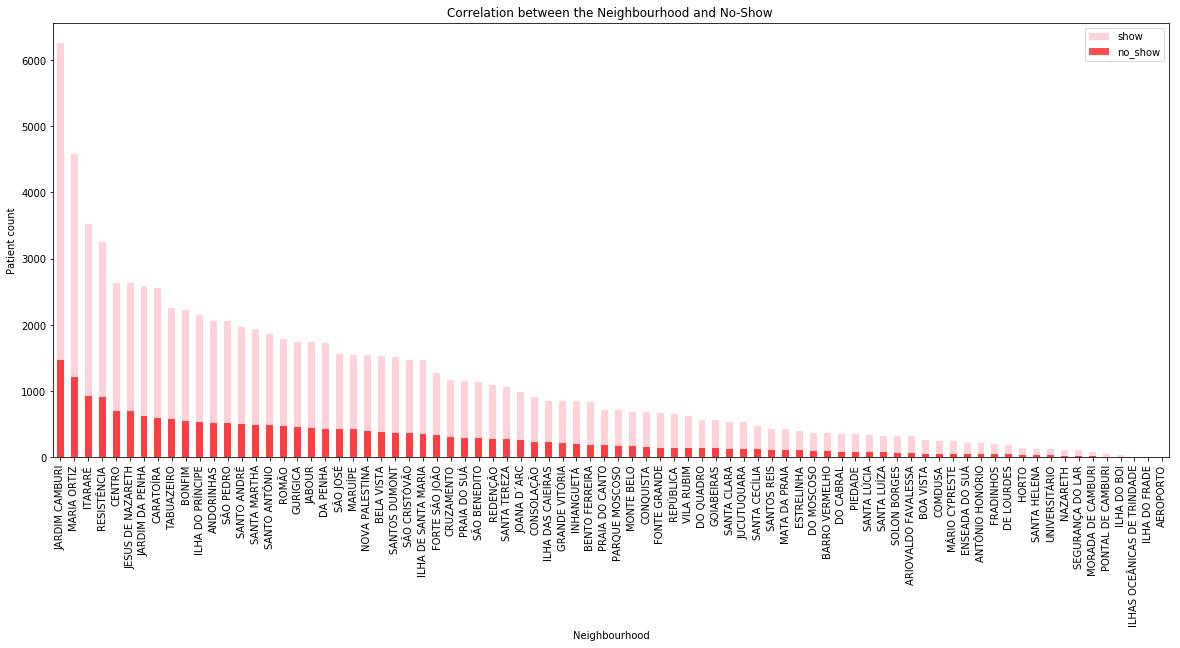

In [24]:
plt.figure(figsize=(20, 8))
df.neighbourhood[show].value_counts().plot(alpha=.7, label= 'show', kind='bar', color='pink' )
df.neighbourhood[no_show].value_counts().plot(alpha=.7, label= 'no_show', kind='bar', color='red' )
plt.legend()
plt.title('Correlation between the Neighbourhood and No-Show ')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient count');

* In the previous graph I tried to find out if there any realtionship between neighbourhood and not showing up, so I made this bar plot between neighbourhood and the number of the patients, while neighbourhood was filtered by show and no-show.



* In this paticular graph it was obvious that there is a strong correlation between neighbourhood and showing up, where it appears very clearly that there are neighbourhoods getting large numbers of patients than other neighbourhoods.

In [21]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

<a id='conclusions'></a>
## Conclusions
* As shown above it is obvious that the number of Female patients = 2 times of the male patients, where females =71839 persones and males = 38687 persones , and this led to high number of females not showing.
* Which means that the correlation between gender and No-Show is very weak.





* There is a pretty strong correlation between age and No-Show, where people aged between 0 and 10 years old were the majority in showing up and attending thier appointments.
* As well as people between 25 and 70 years old.
* After that old people are less showing up.



* Very strange, peolpe have had received a reminder SMS are less showing than the people who havn't.
* So, unfotunately there isn't a correlation between receiving an SMS and showing up.



* Lastly there was a strong relationship between the Neighbourhood and showing up, as there were two neighbourhoods that had very few people that didn't show.
* These neighbourhoods are JARDIM CAMBURI & MARIA ORTIZ.





## Limitations 
* In fact this dataset was very clean and well organized so, I didn't meet many obstacles analyzing it and there weren't so much missing data which made it easy to analyze.


* Although, there might be some additional data (if it's possible to be added) that would be more useful and helpful in finding more correlations between different variables.


* I think one of the variables would affect along with nieghbourhood is the distance between the clinic and where the patient is living, which would affect strongly in showing up.


* Also the speciality that the patient chose could have been useful in the analysis, where we can find a very intersting correlation between speciality and no-show.

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0